In [14]:
import pandas as pd

weight = pd.read_csv('weights.tsv', sep='\t')


print(weight)

    164
0   158
1   172
2   153
3   144
4   156
5   189
6   163
7   134
8   159
9   143
10  176
11  177
12  162
13  141
14  151
15  182
16  185
17  171
18  152


1.2 Create a new series object with weights converted to kilograms from pounds (1 pound = 0.453592 kilograms). Round the results to two decimal places. (4 points) 

In [44]:
import pandas as pd
import numpy as np
weight = pd.read_csv('weights.tsv', sep='\t', header=None, names=['weight'])

weight_in_kg = weight['weight']*0.453592
weight_in_kg = np.round(weight_in_kg, 2)

print(weight_in_kg)

0     74.39
1     71.67
2     78.02
3     69.40
4     65.32
5     70.76
6     85.73
7     73.94
8     60.78
9     72.12
10    64.86
11    79.83
12    80.29
13    73.48
14    63.96
15    68.49
16    82.55
17    83.91
18    77.56
19    68.95
Name: weight, dtype: float64


1.3 Find the mean, median, and standard deviation of both series objects using Pandas functions. (4 points) 


In [120]:
import pandas as pd
import numpy as np
weight = pd.read_csv('weights.tsv', sep='\t', header=None, names=['weight'])
weight_in_kg = weight['weight']*0.453592


print("Weight in kg")
print("mean: ", round(weight_in_kg.mean(), 2))
print("median: ", round(weight_in_kg.median(), 2))
print("std: ", round(weight_in_kg.std(), 2))

print("Weight in lbs")
print("mean: ", round(weight['weight'].mean(), 2))
print("median: ", round(weight['weight'].median(), 2))
print("std: ", round(weight['weight'].std(), 2))

Weight in kg
mean:  73.3
median:  72.8
std:  7.01
Weight in lbs
mean:  161.6
median:  160.5
std:  15.45


1.4 Plot a histogram of weight (in kilograms) using matplotlib library with 10 bins.


(array([1., 3., 0., 3., 3., 3., 2., 2., 1., 2.]),
 array([60.781328, 63.276084, 65.77084 , 68.265596, 70.760352, 73.255108,
        75.749864, 78.24462 , 80.739376, 83.234132, 85.728888]),
 <BarContainer object of 10 artists>)

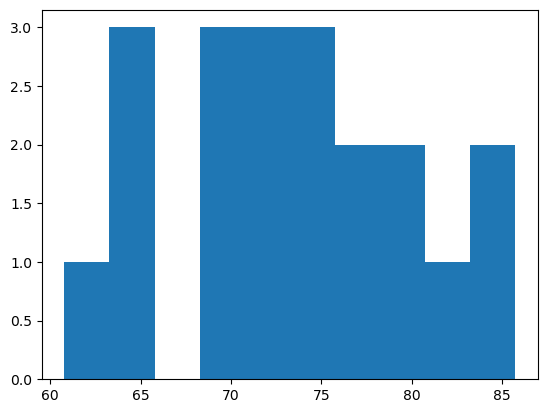

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

weight = pd.read_csv('weights.tsv', sep='\t', header=None, names=['weight'])
weight_in_kg = weight['weight']*0.453592
plt.hist(weight_in_kg, bins=10)

2.0 For this problem statement, you are given a dataset named “boston.csv”. This dataset contains information collected by the US Census Service concerning housing in the areas of Boston, Mass. The data was originally published by Harrison, D., & Rubinfeld, D.L. (1978). Hedonic prices and the demand for clean air. Journal of Environmental Economics and Management,5,81–102.


2.1 Import the dataset “boston.csv” into a Pandas dataframe and obtain the number of rows and columns for the dataframe. (3 points) 


In [58]:
import pandas as pd

dataset = pd.read_csv('boston.csv')
num_columns = len(dataset.columns)
num_rows = len(dataset)

print("Number of columns: ", num_columns)
print("Number of rows: ", num_rows)

Number of columns:  13
Number of rows:  506


2.2 What is the owner-occupied home value (MEDV) for the lowest nitric oxide concentration (NOX) from the dataframe? (3 points) 


In [72]:
import pandas as pd
dataset = pd.read_csv('boston.csv')
min_nox_index = dataset['NOX'].idxmin()
MEDVatMinNox = dataset.loc[min_nox_index, 'MEDV']
print("MEDV at min NOX: ", MEDVatMinNox)


MEDV at min NOX:  20.1


2.3 Create a boxplot of per capita crime rate (CRIM) using Matplotlib. Obtain the interquartile range for crime rate (CRIM) using Pandas functions. (4 points) 


Interquartile Range (IQR): 3.5950375


Text(0.5, 1.0, 'Boxplot of Per Capita Crime Rate')

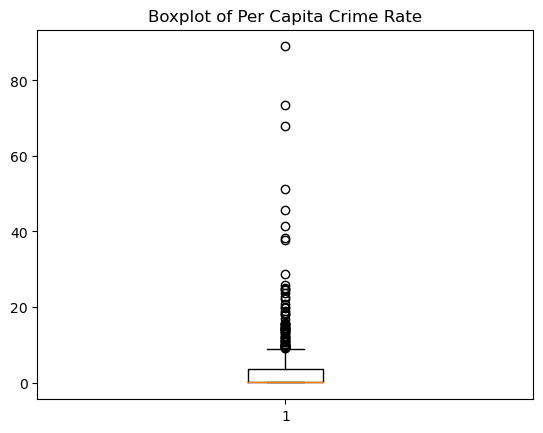

In [85]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
dataset = pd.read_csv('boston.csv')

Q1 = dataset['CRIM'].quantile(0.25)
Q3 = dataset['CRIM'].quantile(0.75)

IQR = Q3-Q1

print("Interquartile Range (IQR):", IQR)

plt.boxplot(dataset['CRIM'])
plt.title('Boxplot of Per Capita Crime Rate')

2.4 Subset all columns of the dataframe for rows with outliers of crime rate into a new dataframe. Compare the mean of AGE between the two dataframes with respect to crime rate, what do you interpret? (Hint: Outliers exist 1.5 times of interquartile range above third quartile and below first quartile) (4 points) 

In [122]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
dataset = pd.read_csv('boston.csv')
Q1 = dataset['CRIM'].quantile(0.25)
Q3 = dataset['CRIM'].quantile(0.75)

IQR = Q3-Q1

lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

outliers = dataset[(dataset['CRIM'] < lower_threshold) | (dataset['CRIM'] > upper_threshold)]

print("mean of age where the crimerate is an outlier: ", (outliers['AGE'].mean()))
print("mean of age of the entire dataset ", (dataset['AGE']).mean())



mean of age where the crimerate is an outlier:  94.23333333333335
mean of age of the entire dataset  68.57490118577076


The fact that the mean age in areas with outlier crime rates is significantly higher suggests that areas with extreme crime rates (either very high or very low) tend to have much older populations. This could mean that either crime rates are especially high or low in neighborhoods with a larger proportion of older residents.


2.5 Create scatterplot between distances to employment centers (DIS) and nitric oxide levels (NOX). Obtain correlation index between the two columns and interpret their relation. (4 points) 

correlation coefficient:  -0.5344315844084571


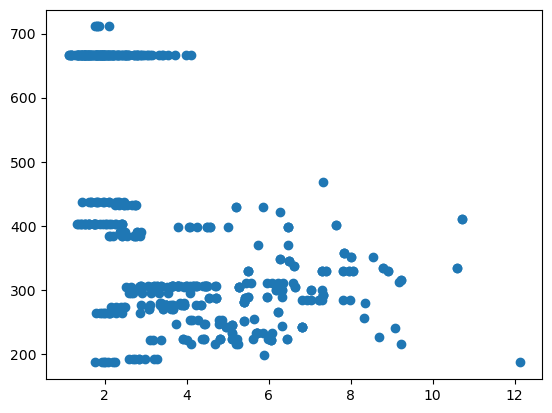

In [111]:
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('boston.csv')
correlation = dataset['DIS'].corr(dataset['TAX'])
print("correlation coefficient: ", correlation)
plt.scatter(dataset['DIS'], dataset['TAX'])
plt.show()


From this correlation coefficent I know that there is a negative correlation between distances to employment centers and nitric oxide levels

2.6: Similarly, create a scatterplot between highway accessibility index (RAD) and property tax rate (TAX). Obtain correlation index, compare it to the scatter-plot, and interpret the relation between RAD and TAX. Take appropriate action on the data based on your observation. (6 points)

correlation:  0.9102281885331849


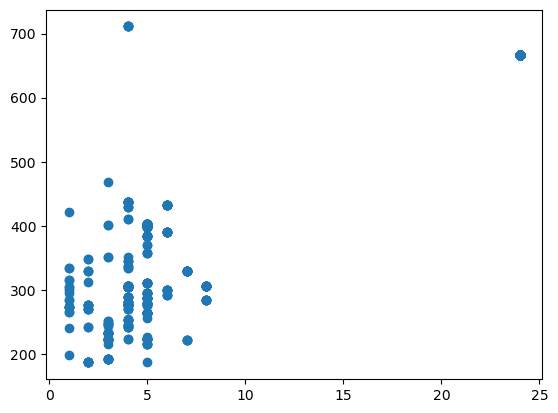

In [117]:
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('boston.csv')
plt.scatter(dataset['RAD'], dataset['TAX'])
correlation = dataset['RAD'].corr(dataset['TAX'])
print("correlation: ", correlation)
plt.show()

A correlation coefficient of 0.91 indicates a strong positive relationship between highway accessibility and property tax rates. This means that areas with higher highway accessibility tend to have higher property tax rates, and vice versa.

3. We will be using the “tips” dataset from seaborn package for this problem statement.
This dataset contains information about restaurant bills and tips made by people
classified by their gender along with few other attributes which are self-explanatory. You
can import this dataset into a pandas dataframe as follows:

3.1 Calculate percentage of tip amounts for bill totals, rounded to two decimal places
and create a new column “tip_percent” in the same dataframe. (3 points)

In [129]:
import seaborn as sns
import pandas as pd
tips_dataset = sns.load_dataset('tips')
tips_dataset['tip_percentage'] = (tips_dataset['total_bill'] / tips_dataset['tip']).round(2)
print(tips_dataset)


     total_bill   tip     sex smoker   day    time  size  tip_percentage
0         16.99  1.01  Female     No   Sun  Dinner     2           16.82
1         10.34  1.66    Male     No   Sun  Dinner     3            6.23
2         21.01  3.50    Male     No   Sun  Dinner     3            6.00
3         23.68  3.31    Male     No   Sun  Dinner     2            7.15
4         24.59  3.61  Female     No   Sun  Dinner     4            6.81
..          ...   ...     ...    ...   ...     ...   ...             ...
239       29.03  5.92    Male     No   Sat  Dinner     3            4.90
240       27.18  2.00  Female    Yes   Sat  Dinner     2           13.59
241       22.67  2.00    Male    Yes   Sat  Dinner     2           11.34
242       17.82  1.75    Male     No   Sat  Dinner     2           10.18
243       18.78  3.00  Female     No  Thur  Dinner     2            6.26

[244 rows x 8 columns]


For what days in the week do we have the data, and which day has the highest bill mean? (Hint: lookup for “groupby” in pandas documentation) (3 points)

In [149]:
import seaborn as sns
import pandas as pd
tips_dataset = sns.load_dataset('tips')
days_of_week = tips_dataset['day'].unique()
grouped = tips_dataset.groupby('day')['total_bill'].mean()
print(grouped)

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64


/var/folders/gv/q00n_g1j1mn1yp2cjljl92440000gn/T/ipykernel_59941/4072739180.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = tips_dataset.groupby('day')['total_bill'].mean()


3.3 Are there more dinners or lunches? Create a dataframe with this data. Are there
more smokers during lunches or dinners? Create another dataframe with this
data. Join the two dataframes by time of day and calculate the percent of
smokers at lunch and dinner. Compare the results. (6 points)

In [1]:
import seaborn as sns
import pandas as pd
tips_dataset = sns.load_dataset('tips')

df = pd.DataFrame() 
df['smoker'] = tips_dataset['smoker']
df['time'] = tips_dataset['time']
group = df.groupby(['smoker', 'time']).size()
print(group)

244


/var/folders/gv/q00n_g1j1mn1yp2cjljl92440000gn/T/ipykernel_8122/4259318723.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group = sum(df.groupby(['smoker', 'time']).size())
